In [1]:
# [1] Импортируем всё необходимое.
import tensorflow as tf
import keras as k
from keras.models import load_model as l_m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Необходимо для обучения. Подключать НЕОБЯЗАТЕЛЬНО!
# В случае, если хотите протестировать обучение - добро пожаловать!
# Тогда измените путь до csv файла на свой.

# Чтение БД, созданной собственноручно.
data_frame = pd.read_csv("train10.csv")

input_names = ["aa","ab","ac","ad","ae","af","ag","ah","ai","aj",
               "ba","bb","bc","bd","be","bf","bg","bh","bi","bj",
               "ca","cb","cc","cd","ce","cf","cg","ch","ci","cj",
               "da","db","dc","dd","de","df","dg","dh","di","dj",
               "ea","eb","ec","ed","ee","ef","eg","eh","ei","ej",
               "fa","fb","fc","fd","fe","ff","fg","fh","fi","fj",
               "ga","gb","gc","gd","ge","gf","gg","gh","gi","gj",
               "ha","hb","hc","hd","he","hf","hg","hh","hi","hj",
               "ia","ib","ic","id","ie","if","ig","ih","ii","ij",
               "ja","jb","jc","jd","je","jf","jg","jh","ji","jj"]

output_names = ["isCycle:"] 

In [ ]:
# Нормализация данных.
def data_frame_to_dict(df):
    result = dict()
    for column in df.columns:
        values = data_frame[column].values
        result[column] = values
    return result

def make_supervised(df):
    raw_input_data = data_frame[input_names]
    raw_output_data = data_frame[output_names]
    return{"inputs":data_frame_to_dict(raw_input_data),
           "outputs":data_frame_to_dict(raw_output_data)}

In [ ]:
def encode(data):
    vectors = []
    for data_name, data_values in data.items():
        encoded = list(map(lambda dn: [dn], data_values))
        vectors.append(encoded)
        
    formatted = []
    for vector_raw in list(zip(*vectors)):
        vector = []
        for element in vector_raw:
            for e in element:
                vector.append(e)
        formatted.append(vector)
    return formatted

In [ ]:
supervised = make_supervised(data_frame)
encoded_inputs = np.array(encode(supervised["inputs"]))
encoded_outputs = np.array(encode(supervised["outputs"]))

In [ ]:
# Обпределение входных и выходных данных, тестов, а также самой нейронной сети.
train_x = encoded_inputs[:999500]
train_y = encoded_outputs[:999500]

test_x = encoded_inputs[999500:]
test_y = encoded_outputs[999500:]

# Как видно, в нашей нейронной сети 2 слоя соответственно с 100 и 1 нейроном,
# Функция активации первого слоя - relu. Второго, для нормализации выхода,
# sigmoid. Метод вычисления ошибки - mse (средн. кв. ошибки). Оптимизатор 
# обучения - adam. Метрики - accuracy (точность).
model = k.Sequential()
model.add(k.layers.Dense(units = 100, activation="relu"))
model.add(k.layers.Dense(units = 1, activation="sigmoid"))
model.compile(loss = "mse", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Обучение, НЕОБЯЗАТЕЛЬНО!
# (не через colab, все выполняли на родном компуктере :3)
# Обучение долгое из-за миллиона строк данных, так что не советую запускать,
# лучше перейдите в конец файла и запустите блок, который выполняет загрузку 
# существующей нейронной сети.
fit_result = model.fit(x = train_x, y = train_y, epochs = 30, validation_split = 0.2)

Epoch 1/30
24988/24988 [==============================] - 210s 8ms/step - loss: 0.1187 - accuracy: 0.8281 - val_loss: 0.0871 - val_accuracy: 0.8796
Epoch 2/30
24988/24988 [==============================] - 198s 8ms/step - loss: 0.0819 - accuracy: 0.8866 - val_loss: 0.0840 - val_accuracy: 0.8862
Epoch 3/30
24988/24988 [==============================] - 204s 8ms/step - loss: 0.0748 - accuracy: 0.8964 - val_loss: 0.0724 - val_accuracy: 0.9003
Epoch 4/30
24988/24988 [==============================] - 200s 8ms/step - loss: 0.0706 - accuracy: 0.9023 - val_loss: 0.0713 - val_accuracy: 0.9020
Epoch 5/30
24988/24988 [==============================] - 190s 8ms/step - loss: 0.0679 - accuracy: 0.9061 - val_loss: 0.0688 - val_accuracy: 0.9043
Epoch 6/30
24988/24988 [==============================] - 196s 8ms/step - loss: 0.0659 - accuracy: 0.9093 - val_loss: 0.0671 - val_accuracy: 0.9060
Epoch 7/30
24988/24988 [==============================] - 193s 8ms/step - loss: 0.0643 - accuracy: 0.9114 - val_

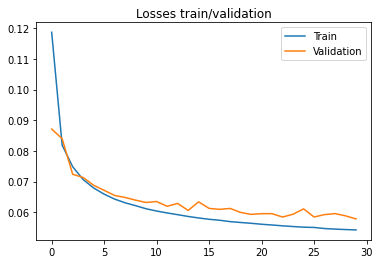

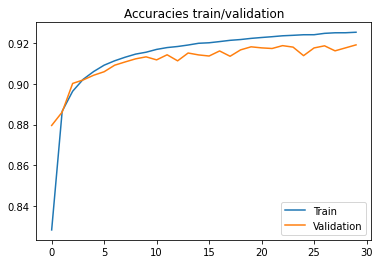

In [ ]:
# Вывод статистики обучения.
plt.title("Losses train/validation")
plt.plot(fit_result.history["loss"], label = "Train")
plt.plot(fit_result.history["val_loss"], label = "Validation")
plt.legend()
plt.show()

plt.title("Accuracies train/validation")
plt.plot(fit_result.history["accuracy"], label = "Train")
plt.plot(fit_result.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

In [ ]:
# Пример поведения с неизвестными данными.
# (последние 500 не обрабатывали, потому и проверяем тут)
predicted_test = model.predict(test_x)
real_data = data_frame.iloc[999500:][input_names + output_names]
real_data["isCycle"] = predicted_test
print(real_data)

        aa  ab  ac  ad  ae  af  ag  ah  ai  aj  ...  jc  jd  je  jf  jg  jh  \
999500   0   0   0   0   0   0   0   1   0   0  ...   0   1   0   0   0   0   
999501   1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
999502   1   1   0   1   1   0   1   0   1   1  ...   0   1   1   1   0   1   
999503   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   
999504   0   1   0   0   0   0   0   0   0   1  ...   0   0   0   0   1   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
999995   1   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   
999996   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
999997   0   0   0   0   0   0   1   0   0   1  ...   0   0   0   1   0   0   
999998   1   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   
999999   1   0   1   1   1   1   0   0   1   0  ...   1   0   0   0   1   1   

        ji  jj  isCycle:   isCycle  
999500   0   0

In [9]:
# [3] Можете попробовать свои примеры ниже!
# Измените путь до h5 файла(файл обученной нейронной сети) на свой.
model = l_m('find_cycle_in_10x10.h5')
example = np.array([0,0,0,0,1,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,1,0,
                    0,0,0,0,0,0,0,0,0,0,
                    0,0,1,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,1,0,0,
                    0,0,0,0,0,0,0,0,0,0,
                    0,1,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0])
x = tf.reshape(tf.cast(example, tf.float32), [-1, 100])
print(model.predict(x))

[[0.04709788]]


In [ ]:
example = np.array([1,0,0,0,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,0,1,0,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,1,0,1,0,1,0,0,0,0,
                    0,0,0,0,1,1,0,0,0,0,])
x = tf.reshape(tf.cast(example, tf.float32), [-1, 100])
print(model.predict(x))

[[1.]]


In [ ]:
# Сохранение обученной нейронной сети(используется при обучении):
# model.save('find_cycle_in_10x10.h5')